# Setup

## 데이터 불러오기

In [216]:
import boto3
import pandas as pd
import botocore
from sagemaker import get_execution_role
import warnings
warnings.filterwarnings('ignore')

role = get_execution_role()

# s3 버킷 접근
bucket = 'sagemaker-studio-fu85vbeabbq'
s3_client = boto3.client('s3')
subfolder = 'data/'

In [217]:
# 학습 데이터 로드
train_key = 'data/train.csv'
response1 = s3_client.get_object(Bucket = bucket, Key = train_key)
train = pd.read_csv(response1['Body'])
train.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,6,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,8,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,9,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [218]:
# 검증 데이터 로드
val_key = 'data/val.csv'
response2 = s3_client.get_object(Bucket = bucket, Key = val_key)
val = pd.read_csv(response2['Body'])
val.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,V29,V30,Class
0,10,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,-0.255991,-0.994878,0
1,22,0.962496,0.328461,-0.171479,2.109204,1.129566,1.696038,0.107712,0.521502,-1.191311,...,0.402492,-0.048508,-1.371866,0.390814,0.199964,0.016371,-0.014605,0.168937,-0.994784,0
2,63,1.145524,0.575068,0.194008,2.598192,-0.092210,-1.044430,0.531588,-0.241888,-0.896287,...,-0.119703,-0.076510,0.691320,0.633984,0.048741,-0.053192,0.016251,0.169496,-0.994502,0
3,69,0.927060,-0.323684,0.387585,0.544474,0.246787,1.650358,-0.427576,0.615371,0.226278,...,0.079359,0.096632,-0.992569,0.085096,0.377447,0.036096,-0.005960,0.331307,-0.994467,0
4,83,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,-0.287012,-0.994373,0


In [219]:
# 테스트 데이터 로드
test_key = 'data/test.csv'
response3 = s3_client.get_object(Bucket = bucket, Key = test_key)
test = pd.read_csv(response3['Body'])
test.head()

,ID,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,AAAA0x1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,AAAA0x2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,AAAA0x5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,AAAA0x7,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,AAAA0xc,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


## 데이터 변형

## Train 변형

In [220]:
train_df = train.drop('ID', axis = 1)
train_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,-0.994972
1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,-0.994972
2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.256131,-0.994960
3,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,0.262698,-0.994901
4,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,0.994900,-0.994901


In [221]:
train_df.shape

(113842, 30)

In [222]:
# taxi_data와 유사, 한 열씩 연속적으로 들어가는 것 확인 가능!
train_df.values.reshape(-1,1)

array([[-1.35835406],
       [-1.34016307],
       [ 1.77320934],
       ...,
       [ 0.82373096],
       [-0.29665339],
       [ 1.03495107]])

In [223]:
train_reshape = train_df.values.reshape(-1,1)

## Val 변형

In [224]:
val_df_x = val.drop(['ID','Class'],axis = 1)
val_df_y = val[['Class']]

val_df_y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [225]:
val_df_x.shape

(28462, 30)

In [226]:
val_reshape = val_df_x.values.reshape(-1,1)
val_reshape[:6]

array([[-0.33826175],
       [ 1.11959338],
       [ 1.04436655],
       [-0.22218728],
       [ 0.49936081],
       [-0.2467611 ]])

## Test 변형

In [227]:
test_df = test.drop(['ID'],axis = 1)
test_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,-0.994983
2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,-0.994960
3,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,-0.237686,-0.994937
4,0.384978,0.616109,-0.874300,-0.094019,2.924584,3.317027,0.470455,0.538247,-0.558895,0.309755,...,0.049924,0.238422,0.009130,0.996710,-0.767315,-0.492208,0.042472,-0.054337,-0.167819,-0.994866


In [228]:
test_reshape = test_df.values.reshape(-1,1)
test_reshape[:6]

array([[-1.35980713],
       [-0.07278117],
       [ 2.53634674],
       [ 1.37815522],
       [-0.33832077],
       [ 0.46238778]])

# 데이터 분포 확인

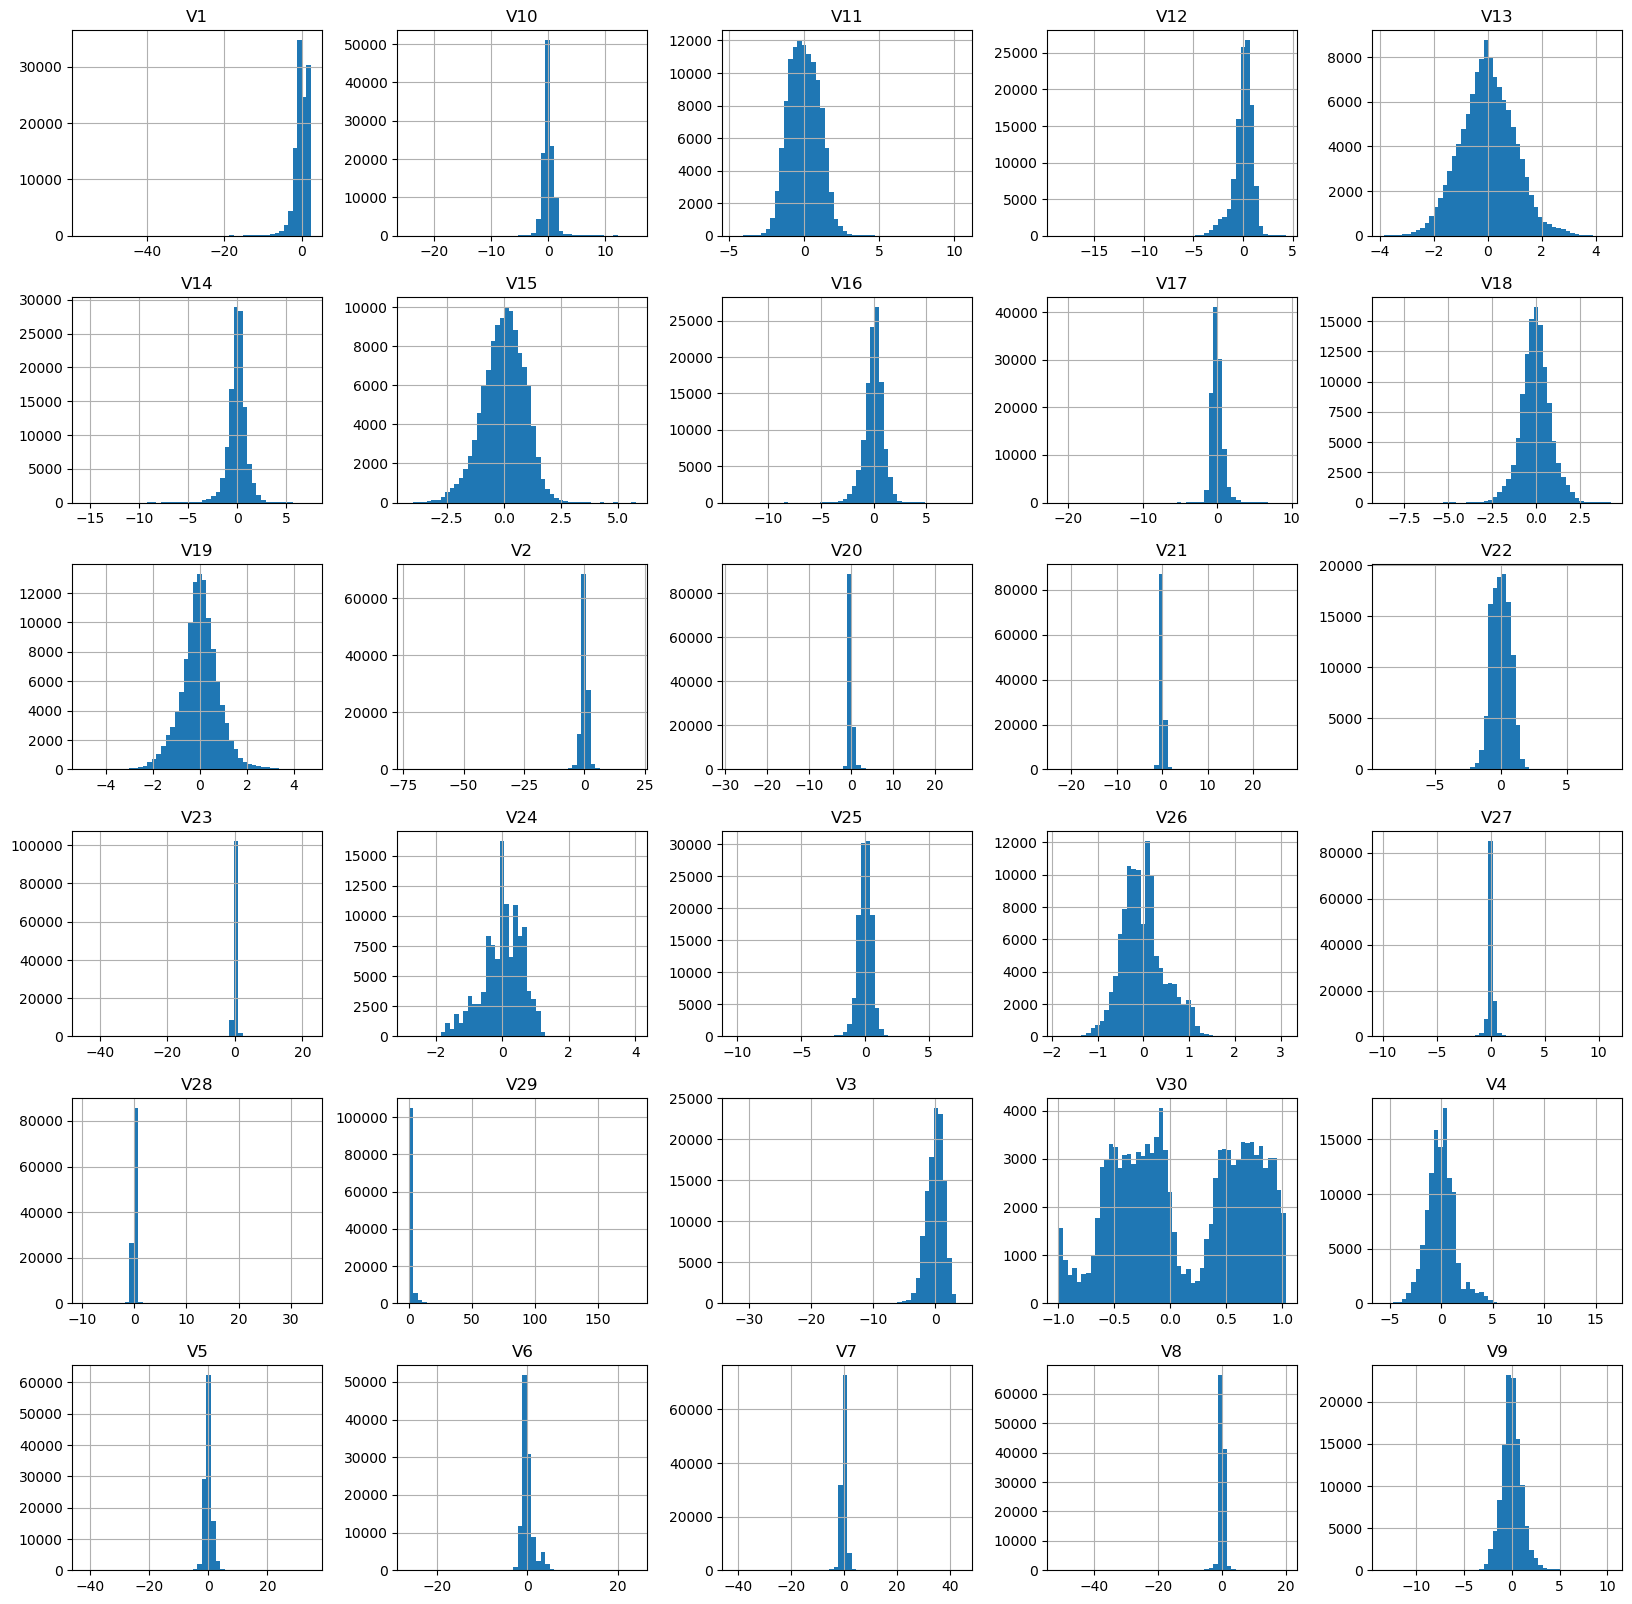

In [229]:
import matplotlib.pyplot as plt

train_df.hist(bins = 50, figsize = (20,20))
plt.show()

# Model

In [230]:
# model은 train set 이용해서 생성

from sagemaker import RandomCutForest

session = sagemaker.Session()

# specify general training job information
rcf = RandomCutForest(
    role=role,
    instance_count=1,
    instance_type="ml.m4.xlarge",
    data_location=f"s3://{bucket}/{prefix}/",
    output_path=f"s3://{bucket}/{prefix}/output",
    num_samples_per_tree=285,
    num_trees=100,
)

# automatically upload the training data to S3 and run the training job
rcf.fit(rcf.record_set(train_reshape))

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.
Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


2022-08-03 03:31:20 Starting - Starting the training job...
2022-08-03 03:31:36 Starting - Preparing the instances for trainingProfilerReport-1659497480: InProgress
.........
2022-08-03 03:33:14 Downloading - Downloading input data...
2022-08-03 03:33:39 Training - Downloading the training image........Docker entrypoint called with argument(s): train
Running default environment configuration script

2022-08-03 03:35:11 Training - Training image download completed. Training in progress.[08/03/2022 03:35:13 INFO 140718191572800] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/resources/default-conf.json: {'num_samples_per_tree': 256, 'num_trees': 100, 'force_dense': 'true', 'eval_metrics': ['accuracy', 'precision_recall_fscore'], 'epochs': 1, 'mini_batch_size': 1000, '_log_level': 'info', '_kvstore': 'dist_async', '_num_kv_servers': 'auto', '_num_gpus': 'auto', '_tuning_objective_metric': '', '_ftp_port': 8999}
[08/03/2022 03:35:13 INFO 14071819157280

In [231]:
# 알고리즘 이름 설명
# https://docs.aws.amazon.com/sagemaker/latest/dg/ex1-train-model.html
print(f"Training job name: {rcf.latest_training_job.job_name}")

Training job name: randomcutforest-2022-08-03-03-31-20-045


# Inference

In [232]:
# https://docs.aws.amazon.com/sagemaker/latest/dg/deploy-model.html
# 또 다른 클러스터..?
rcf_inference = rcf.deploy(initial_instance_count=1, instance_type="ml.m4.xlarge")

Defaulting to the only supported framework/algorithm version: 1. Ignoring framework/algorithm version: 1.


-------!

In [233]:
print(f"Endpoint name: {rcf_inference.endpoint}")

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


Endpoint name: randomcutforest-2022-08-03-03-36-02-855


# Data Serialization/Deserialization

In [234]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

rcf_inference.serializer = CSVSerializer()
rcf_inference.deserializer = JSONDeserializer()

In [235]:
# val로 predict 해서 검증
val_data_numpy = val_reshape
print(val_data_numpy[:6])
results = rcf_inference.predict(
    val_data_numpy[:6], initial_args={"ContentType": "text/csv", "Accept": "application/json"}
)

[[-0.33826175]
 [ 1.11959338]
 [ 1.04436655]
 [-0.22218728]
 [ 0.49936081]
 [-0.2467611 ]]


In [236]:
print(results)

{'scores': [{'score': 0.6196318864}, {'score': 0.7480820267}, {'score': 0.7334936016}, {'score': 0.5941815672}, {'score': 0.6290426858}, {'score': 0.5905780675}]}


In [237]:
val_df_x.shape

(28462, 30)

In [238]:
val_data_numpy.shape

(853860, 1)

# Computing Anomaly Scores

## val 이용한 예측

In [290]:
# 30만까지 predict 값을 내보냄!!!!!
result1 = rcf_inference.predict(val_data_numpy[:300000])
scores = [datum["score"] for datum in result1["scores"]]

# 새로운 데이터 프레임 생성
# add scores to taxi data frame and print first few valaues
val_score = pd.DataFrame({'score':scores}, index = [i+1 for i in range(300000)])
val_score.head()

,score
1,0.619632
2,0.748082
3,0.733494
4,0.594182
5,0.629043


In [291]:
# 300000 데이터 이상 부터 다시 predict
result2 = rcf_inference.predict(val_data_numpy[300000 : 600000])
scores2 = [datum["score"] for datum in result2["scores"]]

# 새로운 데이터 프레임 생성
# add scores to taxi data frame and print first few valaues
val_score2 = pd.DataFrame({'score':scores2}, index = [i+1 for i in range(300000, 600000)])
val_score2.head()

,score
300001,0.735114
300002,0.642003
300003,1.707400
300004,0.945589
300005,0.860231


In [292]:
# 60만 이상부터 predict
result3 = rcf_inference.predict(val_data_numpy[600000 :])
scores3 = [datum["score"] for datum in result3["scores"]]

# 새로운 데이터 프레임 생성
# add scores to taxi data frame and print first few valaues
val_score3 = pd.DataFrame({'score':scores3}, index = [i+1 for i in range(600000,853860)])
val_score3.head()

,score
600001,1.040016
600002,0.647578
600003,0.649266
600004,0.599498
600005,0.649331


## val 전체 DataFrame 생성

In [293]:
val_pred_all = pd.concat([val_score, val_score2, val_score3], axis = 0)
print(val_pred_all.shape)
print(val_pred_all.head())

(853860, 1)
      score
1  0.619632
2  0.748082
3  0.733494
4  0.594182
5  0.629043


## 점수 표준화 하기!

In [294]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
val_pred_all = scaler.fit_transform(val_pred_all)
print(val_pred_all)

[[0.01004079]
 [0.02776804]
 [0.02575471]
 ...
 [0.0044756 ]
 [0.00536219]
 [0.0259013 ]]


In [296]:
val_pred_all.shape

(853860, 1)

In [297]:
val_all = val_pred_all.copy()
val_all = pd.DataFrame(data = val_all, columns = ['score'])
val_all.head()

,score
0,0.010041
1,0.027768
2,0.025755
3,0.006528
4,0.011340


## 그래프 그려보기!

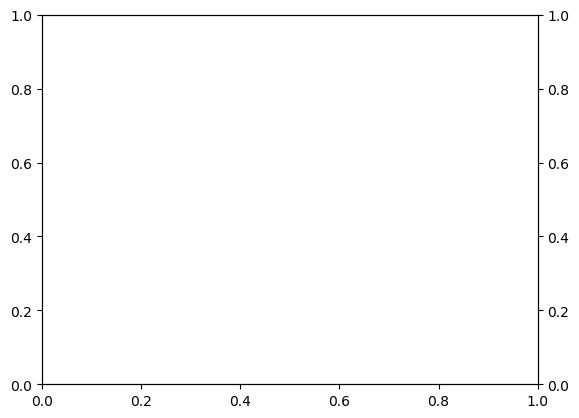

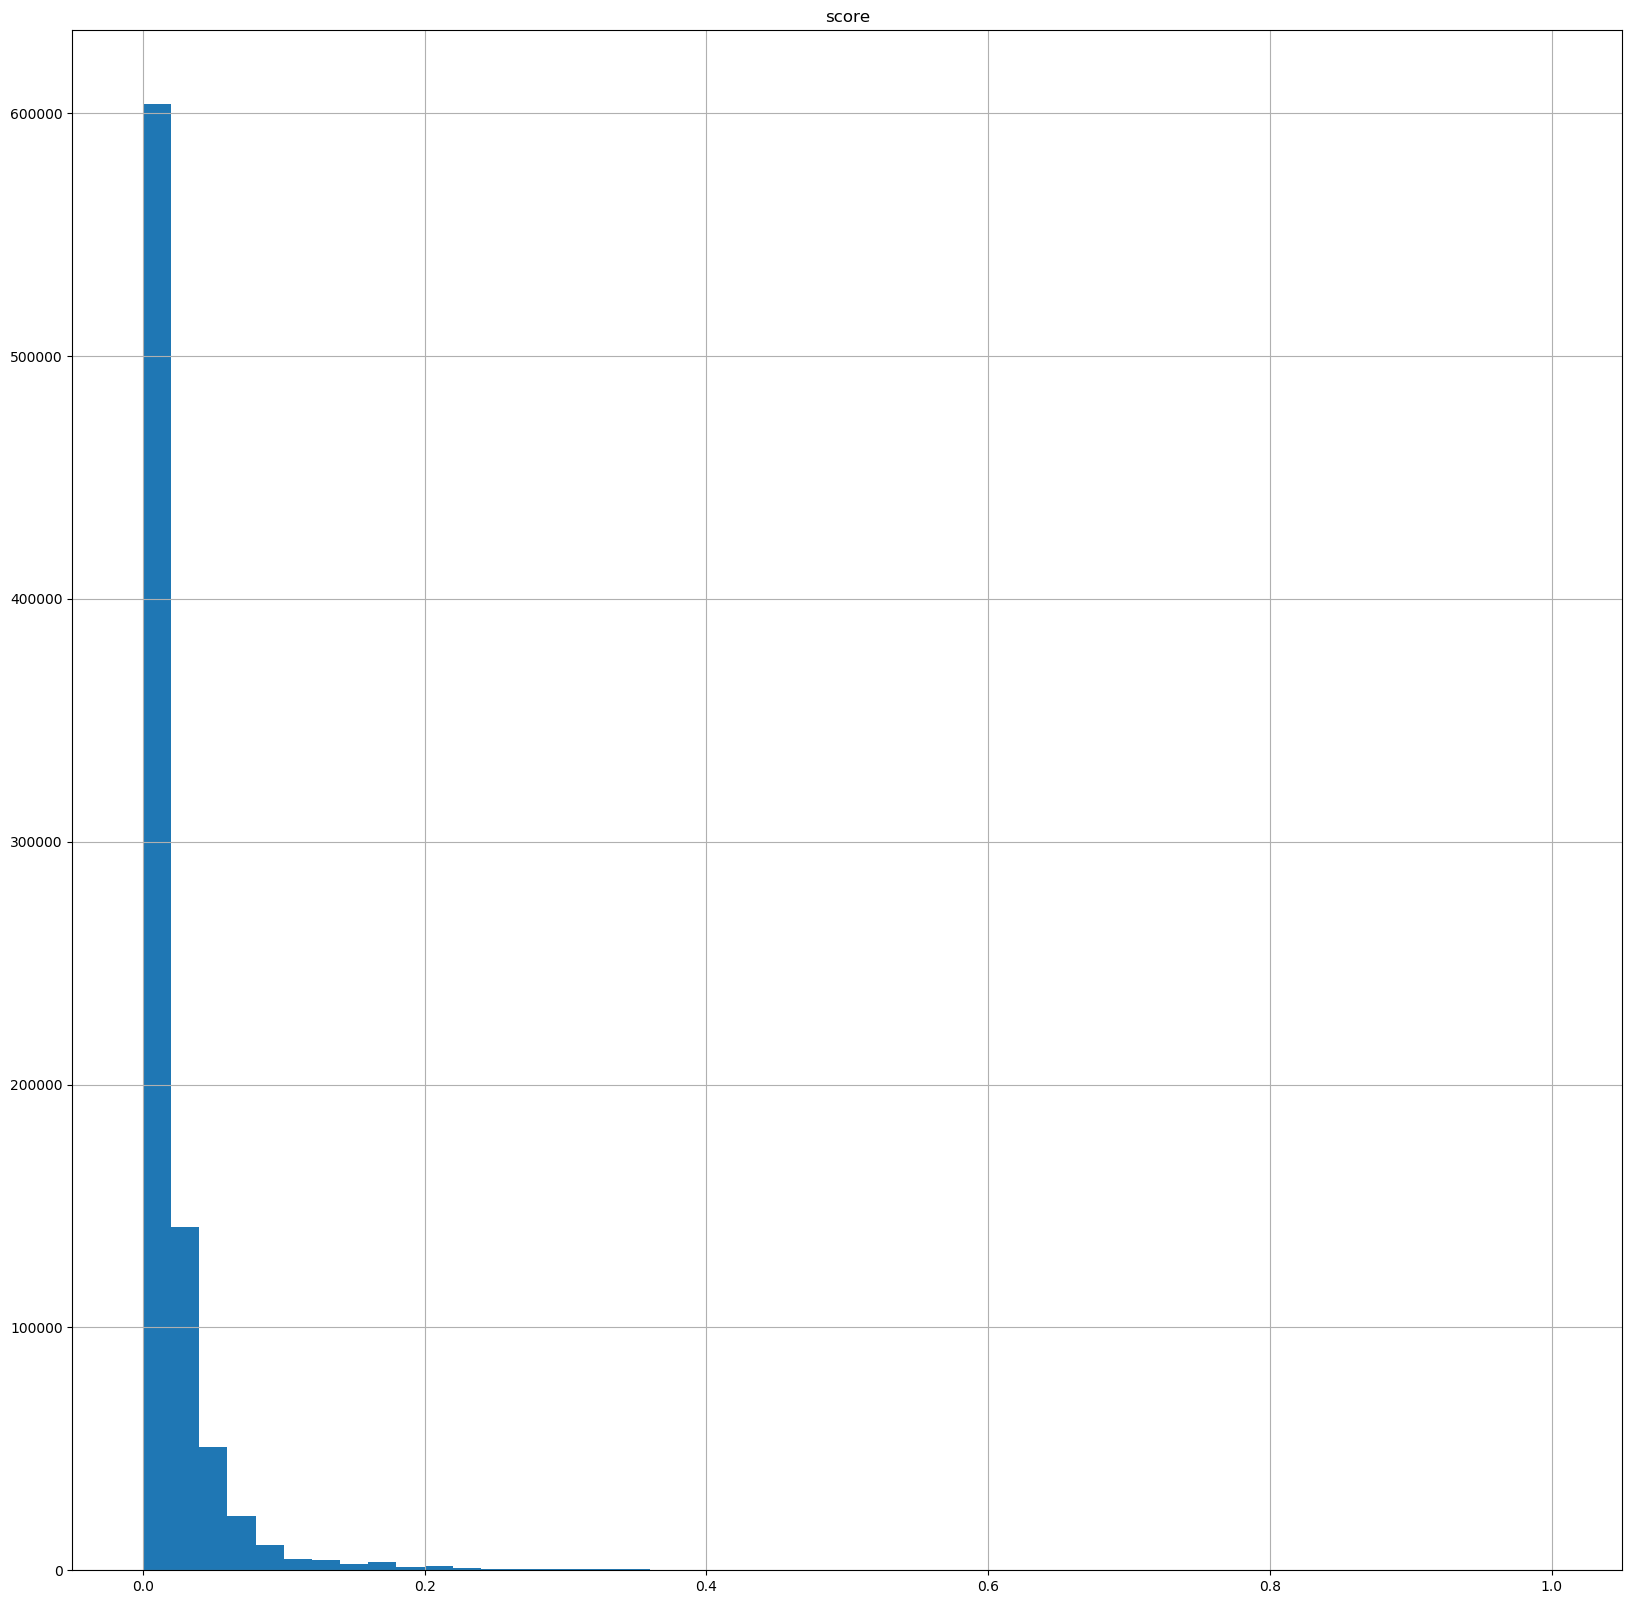

In [298]:
val_all.hist(bins = 50, figsize = (20,20))
plt.show()

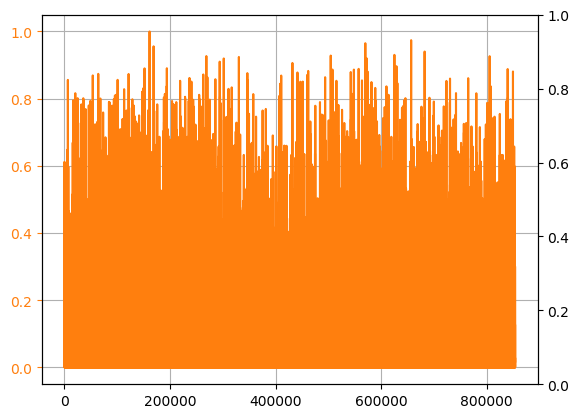

In [299]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

#
# *Try this out* - change `start` and `end` to zoom in on the
# anomaly found earlier in this notebook
#
start, end = 0, len(val_pred_all)
# start, end = 5500, 6500
val_subset = val_all[start:end]

ax1.plot(val_subset["score"], color="C1")

ax1.grid(which="major", axis="both")

ax1.tick_params("y", colors="C1")

# ax1.set_ylim(0, 40000)
plt.show()

In [300]:
val_all.describe()

,score
count,853860.000000
mean,0.022382
std,0.043232
min,0.000000
25%,0.005412
50%,0.011271
75%,0.023838
max,1.000000


In [302]:
val_all[val_all['score'] > 0.5].count()

score    1316
dtype: int64

## 구간 나눈 후 임계값 설정하기
### 구간 나누기

In [245]:
# 0~8까지 구간으로 나누기
def result(score):
    if score < 1:
        answer = 0
    elif score < 2:
        answer = 1
    elif score < 3:
        answer = 2
    elif score < 4:
        answer = 3
    elif score < 5:
        answer = 4
    elif score < 6:
        answer = 5
    elif score < 7:
        answer = 6
    elif score < 8:
        answer = 7
    else:
        answer = 8
    return answer
        
val_pred_all['result'] = val_pred_all['score'].apply(lambda x: result(x)) 
val_pred_all.head(30)

,score,result
1,0.619632,0
2,0.748082,0
3,0.733494,0
4,0.594182,0
5,0.629043,0
6,0.590578,0
7,0.627918,0
8,0.577691,0
9,0.716626,0
10,0.633818,0


In [246]:
val_pred_all['result'].value_counts()

0    799079
1     46410
2      5032
3      1800
4       897
5       459
6       168
7        15
Name: result, dtype: int64

## 30개씩 데이터 변형시키기

In [272]:
new_val_score = val_pred_all['score'].values.reshape(-1, 30)
new_val_score = pd.DataFrame(new_val_score, columns = ['V'+str(i+1) for i in range(30)])
new_val_score

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0.619632,0.748082,0.733494,0.594182,0.629043,0.590578,0.627918,0.577691,0.716626,0.633818,...,0.590973,0.663885,0.579706,0.622779,0.571939,0.575041,0.597568,0.572823,0.601483,0.747791
1,0.712996,0.613158,0.589003,1.079327,0.748206,0.955930,0.582829,0.626369,0.836102,0.650678,...,0.585914,0.621306,0.568757,0.888117,0.614214,0.586985,0.568058,0.572049,0.583875,0.747874
2,0.748458,0.632530,0.578667,1.491188,0.578645,0.751984,0.628724,0.585350,0.743862,0.675548,...,0.566153,0.577850,0.572369,0.640766,0.643317,0.566769,0.571107,0.568090,0.587024,0.747895
3,0.713413,0.609733,0.611116,0.618010,0.597344,0.929997,0.649080,0.644502,0.602714,0.595602,...,0.572021,0.580667,0.573700,0.748956,0.570677,0.605621,0.553475,0.572531,0.617490,0.747897
4,1.706547,1.491592,0.862001,1.279022,0.617146,0.748651,1.052878,1.081706,2.127514,3.189413,...,0.735728,0.604058,0.591111,0.627841,0.589714,0.632162,0.599960,0.798728,0.592810,0.747898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,0.646077,0.842709,0.607415,0.714679,0.626649,0.657955,0.744015,0.612585,0.796345,0.571742,...,0.606706,0.668061,0.596788,0.549425,0.563553,0.632115,0.625456,0.588461,0.590319,0.734662
28458,0.712045,0.643369,0.735159,0.642463,0.701247,0.705944,0.675932,0.608485,0.719878,0.839471,...,0.562705,0.646357,0.583980,0.641878,0.579591,0.608389,0.571619,0.572316,0.676175,0.734419
28459,0.653306,0.796784,0.587679,0.722934,0.637306,0.658184,0.780320,0.754751,0.639847,0.574316,...,0.688692,0.615961,0.578558,0.574579,0.565923,0.643445,0.625382,0.603353,0.624546,0.734434
28460,1.052446,0.594450,0.836275,0.614850,0.569124,0.715819,0.568020,0.581495,0.610263,0.609998,...,0.594821,0.709499,0.625286,0.635817,0.609606,0.587229,0.581304,0.577522,0.591395,0.734556


In [273]:
new_val_result = val_pred_all['result'].values.reshape(-1, 30)
new_val_result = pd.DataFrame(new_val_result, columns = ['V'+str(i+1) for i in range(30)])
new_val_result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,1,1,2,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28457,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28459,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28460,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [274]:
# 행 별로 max인 값 내밷기
## 아님 카운트 큰거?

new_val_result['class'] = new_val_result.max(axis = 1,numeric_only = True)
new_val_result['class'].value_counts()

1    16017
0     7956
2     2644
3      869
4      519
5      303
6      139
7       15
Name: class, dtype: int64

### 임계값 설정하기

In [278]:
# 내가 생성하는 cutoff 기준 - 6이상!
def re_define(num):
    if num > 5:
        answer = 1
    else:
        answer = 0
    return answer

new_val_result['class'] = new_val_result['class'].apply(lambda x: re_define(x))
new_val_result['class'].value_counts()

0    28462
Name: class, dtype: int64

In [276]:
new_val_result['real_class'] = val_df_y
new_val_result['real_class'].value_counts()

0    28432
1       30
Name: real_class, dtype: int64

### 평가하기

In [277]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

val_score = f1_score(new_val_result['real_class'], new_val_result['class'], average='macro')
print(f'Validation F1 Score : [{val_score}]')
print(classification_report(new_val_result['real_class'], new_val_result['class']))

Validation F1 Score : [0.5267520590184712]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     28432
           1       0.03      0.50      0.06        30

    accuracy                           0.98     28462
   macro avg       0.52      0.74      0.53     28462
weighted avg       1.00      0.98      0.99     28462



# Test 적용하기

In [258]:
test_reshape.shape

(4275090, 1)

In [259]:
# 30만까지 predict 값을 내보냄!!!!!
# 15번 반복 
def predict(start,end):
    result = rcf_inference.predict(test_reshape[start:end])
    scores = [datum["score"] for datum in result["scores"]]

    # 새로운 데이터 프레임 생성
    # add scores to taxi data frame and print first few valaues
    val_score = pd.DataFrame({'score':scores}, index = [i+1 for i in range(start,end)])
    return val_score

In [260]:
# 전체 df 생성
start_end = [[0,300000],[300000,600000],[600000,900000],[900000,1200000],[1200000,1500000], [1500000, 1800000],
            [1800000, 2100000],[2100000,2400000],[2400000,2700000],[2700000,3000000],[3000000,3300000],[3300000,3600000],[3600000,3900000],
            [3900000,4200000],[4200000,4275090]]

new_val = pd.concat([predict(nums[0],nums[1]) for nums in start_end], axis = 0)

print(new_val.shape)

(4275090, 1)


In [261]:
new_test = new_val

In [262]:
# 0~8까지 구간으로 나누기
# result 만들기
def result(score):
    if score < 1:
        answer = 0
    elif score < 2:
        answer = 1
    elif score < 3:
        answer = 2
    elif score < 4:
        answer = 3
    elif score < 5:
        answer = 4
    elif score < 6:
        answer = 5
    elif score < 7:
        answer = 6
    elif score < 8:
        answer = 7
    else:
        answer = 8
    return answer
        
new_test['result'] = new_test['score'].apply(lambda x: result(x)) 
new_test.head(30)

,score,result
1,0.885104,0
2,0.582552,0
3,1.463603,1
4,0.827890,0
5,0.619648,0
6,0.630235,0
7,0.606238,0
8,0.579144,0
9,0.602484,0
10,0.567326,0


In [263]:
new_test_score = new_test['score'].values.reshape(-1, 30)
new_test_score = pd.DataFrame(new_test_score, columns = ['V'+str(i+1) for i in range(30)])
new_test_score

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0.885104,0.582552,1.463603,0.827890,0.619648,0.630235,0.606238,0.579144,0.602484,0.567326,...,0.575253,0.606176,0.574867,0.578631,0.589676,0.586957,0.591398,0.574561,0.968794,0.747783
1,0.764423,0.605440,0.582217,0.618968,0.574280,0.584394,0.576392,0.570678,0.601538,0.587178,...,0.596545,0.664740,0.577759,0.620251,0.583042,0.589081,0.569020,0.574502,0.592499,0.747783
2,0.825874,0.695202,0.902999,0.618993,0.629156,0.572823,0.643332,0.592453,0.680356,0.670958,...,0.567356,0.676869,0.581494,0.586012,0.595045,0.627295,0.592498,0.596201,0.632595,0.747773
3,0.775083,0.586711,0.567391,0.762771,0.584961,0.618014,0.569989,0.579642,0.628633,0.577578,...,0.584976,0.592122,0.571687,0.724870,0.669720,0.601978,0.553018,0.561387,0.590958,0.747763
4,0.610251,0.645244,0.748120,0.581859,1.641371,1.794927,0.630521,0.624313,0.658304,0.618108,...,0.565374,0.608776,0.565874,0.724384,0.714612,0.656649,0.553339,0.572595,0.584130,0.747806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,0.592558,0.700308,0.661883,0.715471,0.571421,0.754904,0.619124,0.583007,0.592428,0.576983,...,0.578436,0.629793,0.593988,0.568421,0.943603,0.585892,0.580510,0.596245,0.551291,0.734556
142499,1.043815,0.569741,0.763989,0.617456,0.763258,2.970141,0.950096,1.076692,0.755592,0.656127,...,0.579069,0.627582,0.633931,0.659096,0.652791,0.580795,0.624070,0.590226,0.675455,0.734556
142500,0.717853,0.571952,1.052579,0.716757,0.702291,0.741172,0.554668,0.631243,0.640823,0.734849,...,0.591130,0.713606,0.568706,0.753947,0.660280,0.633837,0.577407,0.571212,0.553257,0.734556
142501,0.999745,0.602199,1.864796,0.658047,1.511653,1.707898,0.598187,0.652235,0.621173,0.645334,...,0.610461,0.636946,0.574607,0.637627,0.604833,0.579039,0.563358,0.579671,0.638363,0.734556


In [264]:
new_test_result = new_test['result'].values.reshape(-1, 30)
new_test_result = pd.DataFrame(new_test_result, columns = ['V'+str(i+1) for i in range(30)])
new_test_result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142499,1,0,0,0,0,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
142500,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142501,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
# 행 별로 max인 값 내밷기
## 아님 카운트 큰거?

new_test_result['class'] = new_test_result.max(axis = 1,numeric_only = True)
new_test_result['class'].head(10)

0    1
1    0
2    0
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: class, dtype: int64

In [266]:
new_test_result['class'].value_counts()

1    79774
0    39649
2    13813
3     4329
4     2598
5     1525
6      684
7      131
Name: class, dtype: int64

In [267]:
# 내가 생성하는 cutoff 기준 - 6이상!
def re_define(num):
    if num > 5:
        answer = 1
    else:
        answer = 0
    return answer

new_test_result['class'] = new_test_result['class'].apply(lambda x: re_define(x))
new_test_result['class'].value_counts()

0    141688
1       815
Name: class, dtype: int64

# submission 정리

In [268]:
# submission 데이터 로드
submit_key = 'data/sample_submission.csv'
response4 = s3_client.get_object(Bucket = bucket, Key = submit_key)
submit = pd.read_csv(response4['Body'])
submit.head()

,ID,Class
0,AAAA0x1,1
1,AAAA0x2,1
2,AAAA0x5,1
3,AAAA0x7,1
4,AAAA0xc,1


In [269]:
submit['Class'] = new_test_result['class']

submit.head()

,ID,Class
0,AAAA0x1,0
1,AAAA0x2,0
2,AAAA0x5,0
3,AAAA0x7,0
4,AAAA0xc,0


In [270]:
submit['Class'].value_counts()

0    141688
1       815
Name: Class, dtype: int64

In [271]:
import s3fs

s3 = s3fs.S3FileSystem(anon=False)

# Use 'w' for py3, 'wb' for py2
with s3.open('sagemaker-studio-fu85vbeabbq/submission_rcf_1.csv','w') as f:
    submit.to_csv(f,index = False)

In [214]:
sagemaker.Session().delete_endpoint(rcf_inference.endpoint)

The endpoint attribute has been renamed in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.
